<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/urpimageclassificationtf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

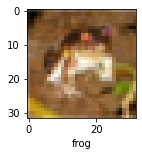

In [10]:
plot_sample(X_train, y_train, 0)

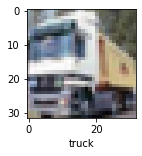

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Build simple artificial neural network for image classification**

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8140 - accuracy: 0.3500
Epoch 2/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6282 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.5471 - accuracy: 0.4529
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4837 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4353 - accuracy: 0.4939


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.35      0.45      1000
           1       0.33      0.80      0.46      1000
           2       0.49      0.14      0.22      1000
           3       0.39      0.25      0.30      1000
           4       0.50      0.30      0.38      1000
           5       0.55      0.17      0.26      1000
           6       0.54      0.48      0.51      1000
           7       0.39      0.65      0.49      1000
           8       0.53      0.50      0.52      1000
           9       0.37      0.61      0.46      1000

    accuracy                           0.42     10000
   macro avg       0.47      0.42      0.40     10000
weighted avg       0.47      0.42      0.40     10000



# **Now let us build a convolutional neural network to train our images**

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4502 - accuracy: 0.4775
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0978 - accuracy: 0.6149
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9646 - accuracy: 0.6655
Epoch 4/10
 572/1563 [=========>....................] - ETA: 36s - loss: 0.8762 - accuracy: 0.6953

KeyboardInterrupt: ignored

# **With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]